In [42]:
import pandas as pd

# Wczytaj dane z pliku CSV (zamień 'nazwa_pliku.csv' na faktyczną nazwę pliku)
df = pd.read_csv('t_test_results.csv')

# Przefiltruj dane dla "bitcoin"
df_bitcoin = df[df['crypto'] == 'bitcoin']


In [43]:
import numpy as np
# Wyodrębnij unikalne klasyfikatory
classifiers = sorted(set(df_bitcoin['Classifier 1']).union(set(df_bitcoin['Classifier 2'])))[:6]  # Pierwsze 6 unikalnych klasyfikatorów

# Stwórz pustą macierz p-value
p_values_matrix = pd.DataFrame(index=classifiers, columns=classifiers)

# Wypełnij macierz p-value odpowiednimi wartościami
for _, row in df_bitcoin.iterrows():
    if row['Classifier 1'] in classifiers and row['Classifier 2'] in classifiers:
        p_values_matrix.at[row['Classifier 1'], row['Classifier 2']] = row['p-value']
        p_values_matrix.at[row['Classifier 2'], row['Classifier 1']] = row['p-value']  # Macierz symetryczna

# Zamień brakujące wartości na 1 (lub inną wartość, która oznacza brak związku)
p_values_matrix = p_values_matrix.fillna(np.nan)


C:\Users\Radosz\AppData\Local\Temp\ipykernel_4888\3287971344.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  p_values_matrix = p_values_matrix.fillna(np.nan)


In [44]:
p_values_matrix

,BRF,DT,KNN,LR,MLP,RF
BRF,NaN,5.315185e-04,8.522861e-06,5.968491e-02,2.220446e-16,1.925675e-01
DT,5.315185e-04,NaN,1.017437e-06,3.616352e-06,6.746603e-12,8.160925e-01
KNN,8.522861e-06,1.017437e-06,NaN,6.705747e-13,4.703771e-01,2.936951e-03
LR,5.968491e-02,3.616352e-06,6.705747e-13,NaN,6.625446e-02,3.654564e-07
MLP,2.220446e-16,6.746603e-12,4.703771e-01,6.625446e-02,NaN,0.000000e+00
RF,1.925675e-01,8.160925e-01,2.936951e-03,3.654564e-07,0.000000e+00,NaN


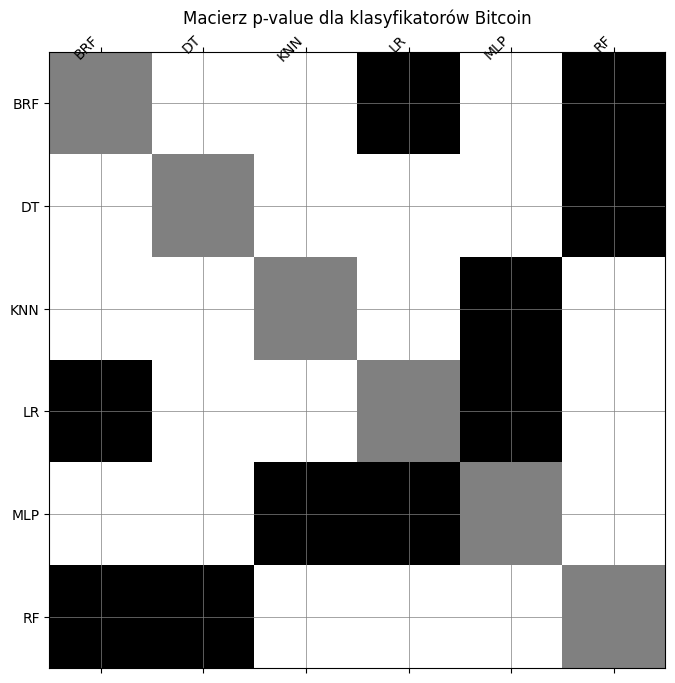

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Ustawienia wykresu
fig, ax = plt.subplots(figsize=(8, 8))

# Stwórz macierz kolorów (0 dla białego, 1 dla czarnego, 0.5 dla szarego)
colors = p_values_matrix.copy()
colors = np.where(colors > 0.05, 1, colors)  # Czarny dla p-value > 0.05
colors = np.where(colors <= 0.05, 0, colors)  # Biały dla p-value <= 0.05
colors = np.where(np.isnan(colors), 0.5, colors)  # Szary dla brakujących danych (np.nan)

# Definiuj niestandardową kolormapę
cmap = mcolors.ListedColormap(['white', 'gray', 'black'])

# Wyświetl macierz jako obraz
cax = ax.matshow(colors, cmap=cmap)

# Ustawienia osi
ax.set_xticks(np.arange(len(classifiers)))
ax.set_yticks(np.arange(len(classifiers)))
ax.set_xticklabels(classifiers)
ax.set_yticklabels(classifiers)

# Obróć etykiety osi x
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Dodaj siatkę
ax.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.title('Macierz p-value dla klasyfikatorów Bitcoin')
plt.show()
